In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.append('..')

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from plot.band_plot import line_bar_plot

In [4]:
epsilon_values = [0.02, 0.04, 0.06, 0.08, 0.1]

In [5]:
strategy = 'community_naive_random'

In [6]:
file_dir = os.path.join('../results/',
                        strategy,
                        'epsilon_{:.2f}.csv')

In [7]:
df_list = [pd.read_csv(file_dir.format(epsilon)) for epsilon in epsilon_values]

In [8]:
for index, epsilon in enumerate(epsilon_values):
    df_list[index]['epsilon'] = epsilon

In [9]:
concat_df = pd.concat(df_list, axis=0)

In [10]:
concat_df['recall_percentage'] = concat_df['recall_count'] / np.minimum(concat_df['num_lookup'], concat_df['k'])

In [11]:
concat_df['discovery_rate'] = (concat_df['recall_count'] > 0).astype(int)

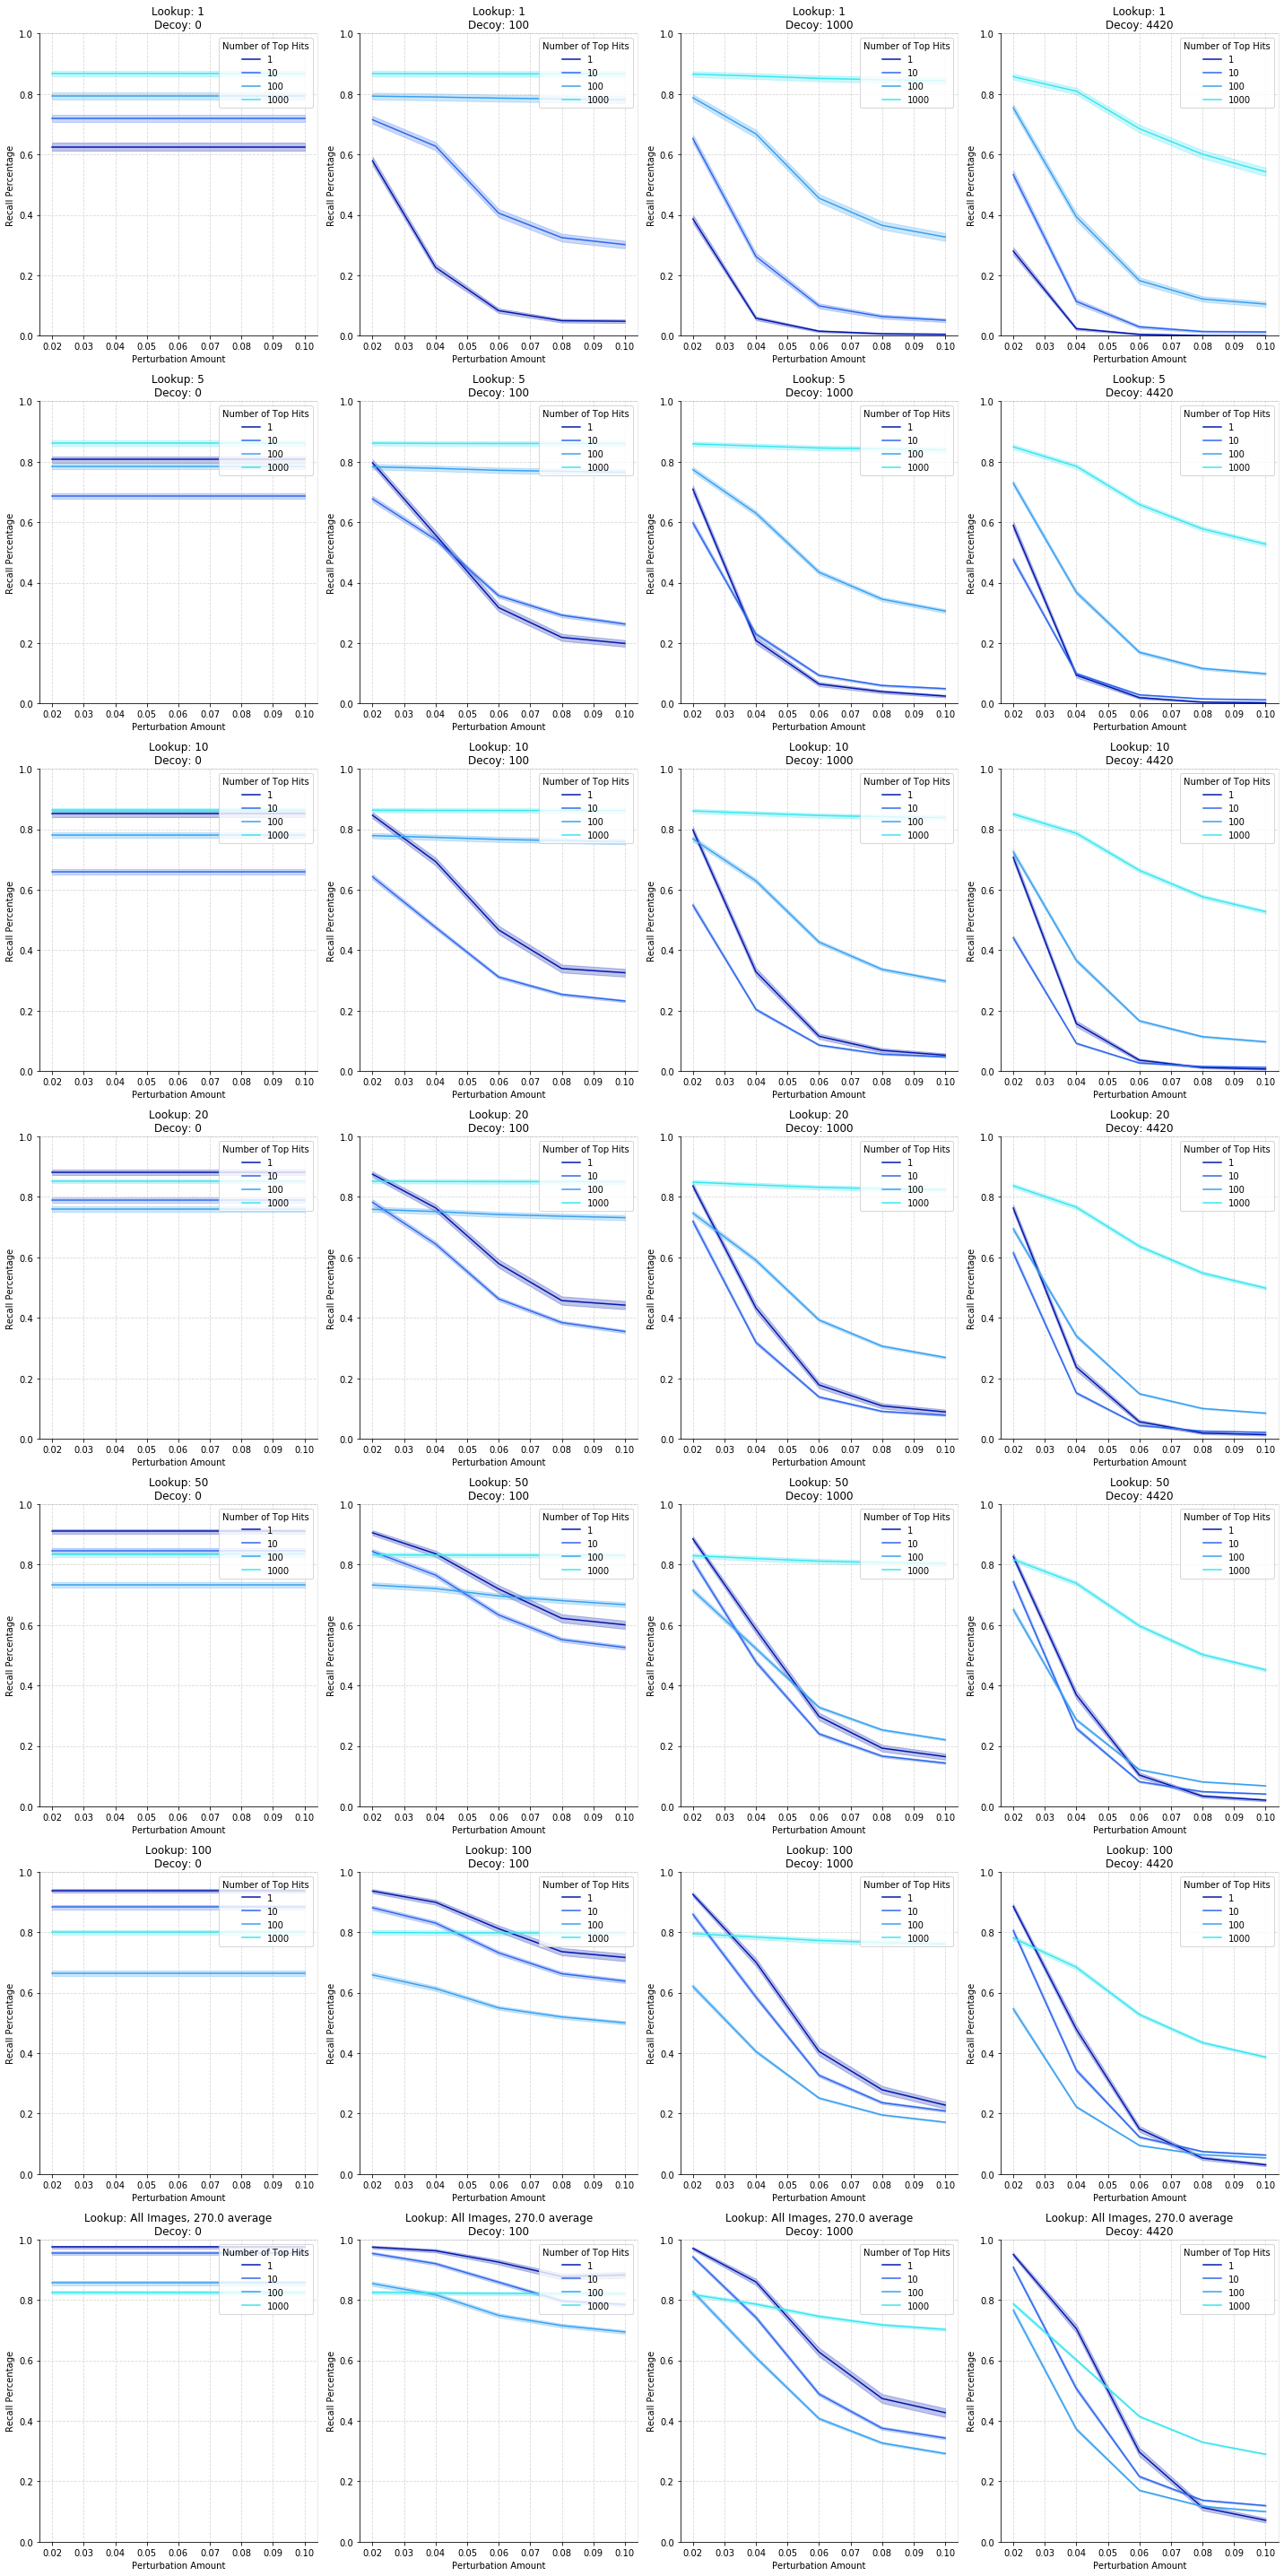

In [18]:
fig, axs = plt.subplots(7, 4, figsize=(20, 40))

for i, num_lookup in enumerate([1, 5, 10, 20, 50, 100, None]):
    for j, num_decoy in enumerate([0, 100, 1000, 4420]):
        ax = axs[i, j]

        if num_lookup is None:
            mask = np.logical_and(concat_df['num_decoy'] == num_decoy,
                                  concat_df['num_lookup'] > 100)
            num_lookup_label = 'All Images, {:.1f} average'.format(np.mean(concat_df.loc[concat_df['num_lookup'] > 100, 'num_lookup']))
        else:
            mask = np.logical_and(concat_df['num_decoy'] == num_decoy,
                                  concat_df['num_lookup'] == num_lookup)
            num_lookup_label = num_lookup

        _       = line_bar_plot(x='epsilon',
                                y='recall_percentage',
                                data=concat_df[mask],
                                color_by='k',
                                ax=ax,
                                use_bootstrap=False,
                                color='royalblue',
                                title='Lookup: {}\nDecoy: {}'.format(num_lookup_label,
                                                                     num_decoy),
                                ylabel='Recall Percentage',
                                xlabel='Perturbation Amount',
                                legend_title='Number of Top Hits',
                                colors=['#0017ad',
                                        '#2d67ed',
                                        '#37a0f0',
                                        '#37e6f0'])
        ax.set_ylim([0.0, 1.0])
plt.tight_layout()

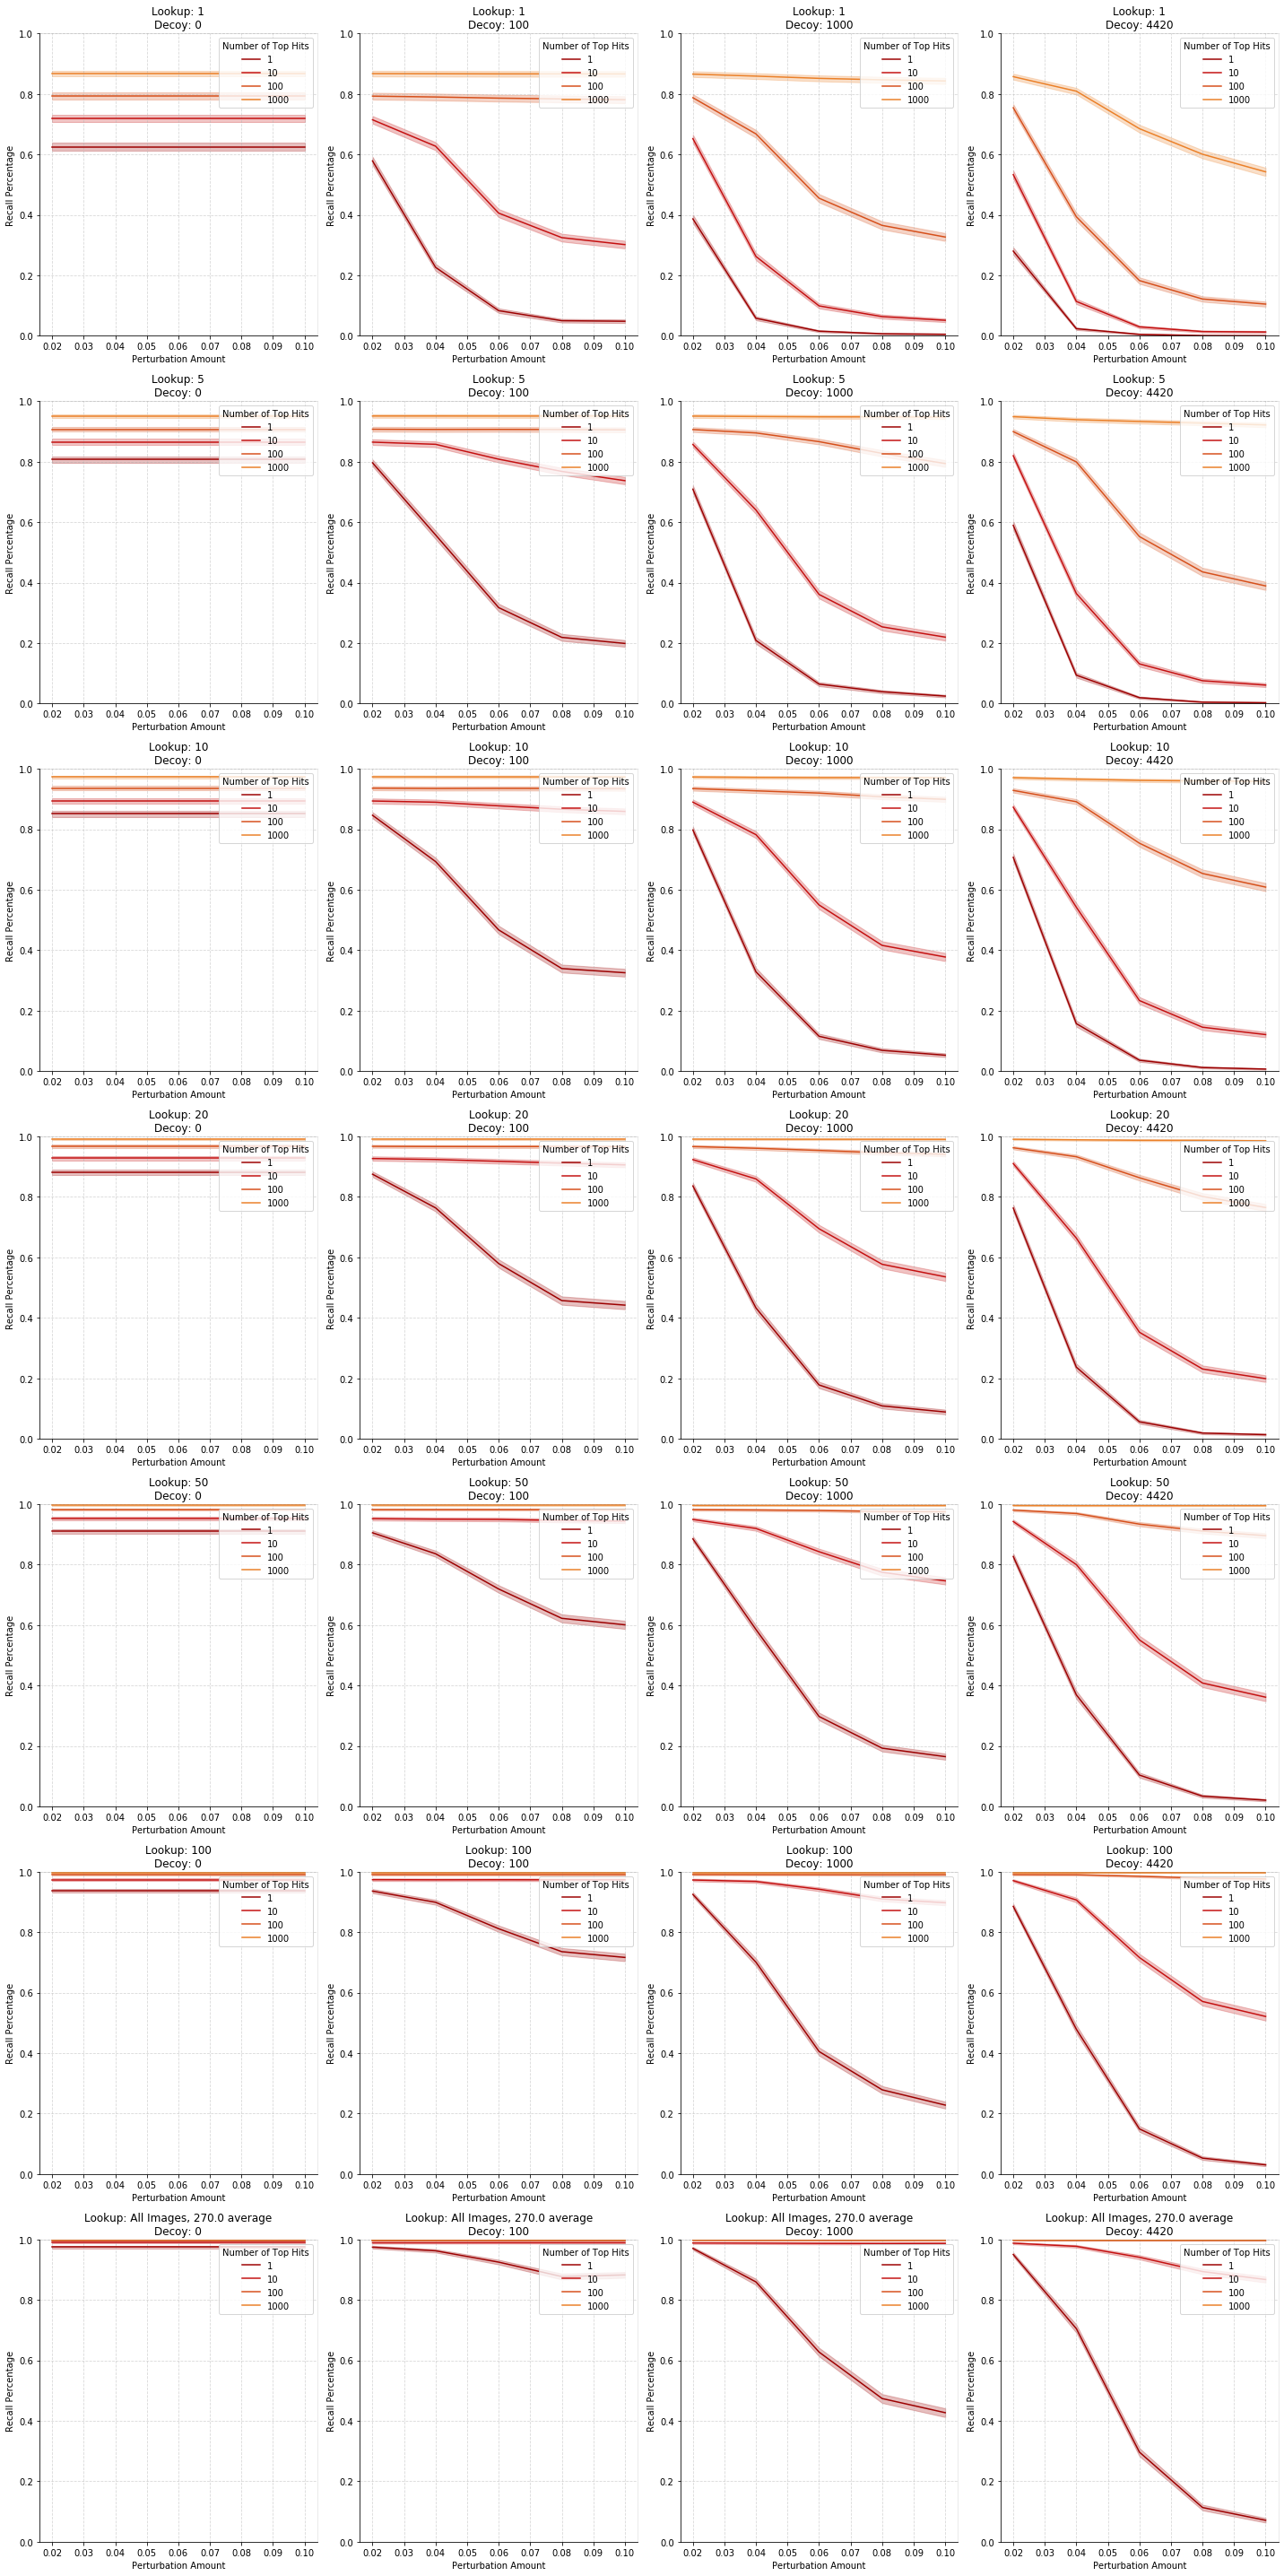

In [20]:
fig, axs = plt.subplots(7, 4, figsize=(20, 40))

for i, num_lookup in enumerate([1, 5, 10, 20, 50, 100, None]):
    for j, num_decoy in enumerate([0, 100, 1000, 4420]):
        ax = axs[i, j]

        if num_lookup is None:
            mask = np.logical_and(concat_df['num_decoy'] == num_decoy,
                                  concat_df['num_lookup'] > 100)
            num_lookup_label = 'All Images, {:.1f} average'.format(np.mean(concat_df.loc[concat_df['num_lookup'] > 100, 'num_lookup']))
        else:
            mask = np.logical_and(concat_df['num_decoy'] == num_decoy,
                                  concat_df['num_lookup'] == num_lookup)
            num_lookup_label = num_lookup

        _       = line_bar_plot(x='epsilon',
                                y='discovery_rate',
                                data=concat_df[mask],
                                color_by='k',
                                ax=ax,
                                use_bootstrap=False,
                                color='royalblue',
                                title='Lookup: {}\nDecoy: {}'.format(num_lookup_label,
                                                                     num_decoy),
                                ylabel='Recall Percentage',
                                xlabel='Perturbation Amount',
                                legend_title='Number of Top Hits',
                                colors=['#9c0000',
                                        '#c41010',
                                        '#d64f1a',
                                        '#eb8028'])
        ax.set_ylim([0.0, 1.0])
plt.tight_layout()